Challenge
In this module, we learned how to approach and solve regression problems using linear regression models. Throughout the module, you worked on a house price dataset from Kaggle. In this challenge, you will keep working on this dataset.

The scenario
The housing market is one of the most crucial parts of the economy for every country. Purchasing a home is one of the primary ways to build wealth and savings for people. In this respect, predicting prices in the housing market is a very central topic in economic and financial circles.

The house price dataset from Kaggle includes several features of the houses along with their sale prices at the time they are sold. So far, in this module, you built and implemented some models using this dataset.

In this challenge, you are required to improve your model with respect to its prediction performance.

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks.

Steps
Load the houseprices data from Thinkful's database.


In [245]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sqlalchemy import create_engine
import seaborn as sns

In [246]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df1 = pd.read_sql_query('select* from houseprices', con = engine)

engine.dispose()
df1.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


Do data cleaning, exploratory data analysis, and feature engineering. You can use your previous work in this module. But make sure that your work is satisfactory.


In [422]:
X = pd.concat([df1[['overallcond','grlivarea','fullbath','garagecars']]], axis = 1)
y = df1['saleprice']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   overallcond  1460 non-null   int64
 1   grlivarea    1460 non-null   int64
 2   fullbath     1460 non-null   int64
 3   garagecars   1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


Now, split your data into train and test sets where 20% of the data resides in the test set.


In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)
print(X_train.shape)
print(y_train.shape)


(1095, 4)
(1095,)


In [424]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
print(X_train.shape)
print(y_train.shape)
results = sm.OLS(y_train, X_train).fit()
results.summary()

(1095, 5)
(1095,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     458.4
Date:                Thu, 28 May 2020   Prob (F-statistic):          1.02e-231
Time:                        00:32:16   Log-Likelihood:                -13394.
No. Observations:                1095   AIC:                         2.680e+04
Df Residuals:                    1090   BIC:                         2.682e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.784e+04   1.02e+04     -4.687      0.000   -6.79e+04   -2.78e+04
overallcond  4494.2364   1405.675      3.197      0.001    1736.101    7252.372
grlivarea      73.5275      3.800     19.352      0.000      66.072      80.983
fullbath     1.444e+04   3675.983      3.929      0.000    7229.801    2.17e+04
garagecars   3.974e+04   2362.069     16.824      0.000    3.51e+04    4.44e+04
==============================================================================
Omnibus:                      208.905   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2553.070
Skew:                           0.489   Prob(JB):                         0.00
Kurtosis:                      10.416   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [425]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(X_train.values, i)
   for i in range(X_train.shape[1])], index = X_train.columns)

const          46.029260
overallcond     1.068257
grlivarea       1.814034
fullbath        1.839777
garagecars      1.401560
dtype: float64

Build several linear regression models including Lasso, Ridge, or ElasticNet and train them in the training set. 

In [426]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, y_train)
y_lrmpredict = lrm.predict(X_test)


print("R-squared of the model on the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_lrmpredict)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_lrmpredict)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_lrmpredict)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_lrmpredict) / y_test)) * 100))


R-squared of the model on the training set is: 0.6271706833654755
-----Test set statistics-----
R-squared of the model on the test set is: 0.6398552847776747
Mean absolute error of the prediction is: 29981.144121433623
Mean squared error of the prediction is: 1937784252.938219
Root mean squared error of the prediction is: 44020.27093213102
Mean absolute percentage error of the prediction is: 18.19697706404159


Use k-fold cross-validation to select the best hyperparameters if your models include one!


In [427]:
from sklearn.linear_model import Ridge
RG = Ridge()
pms = [{'alpha':[np.power(10.0,p) for p in np.arange(0,40,1)]}]

from sklearn.model_selection import GridSearchCV
RGcv = GridSearchCV(RG, param_grid=pms)

RGcv.fit(X_train, y_train)

print('Best lambda = ' + str(RGcv.best_estimator_.alpha))
y_test_predRG = RGcv.predict(X_test)



from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

RGbest = Ridge(alpha =1)
RGbest.fit(X_train, y_train)

y_test_predRG = RGbest.predict(X_test)

print("Best R-squared of the model for Ridge on the training set is: {}".format(RGcv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the Ridge model on the test set is: {}".format(RGcv.score(X_test, y_test)))
print("Mean absolute error of the Ridge prediction is: {}".format(mean_absolute_error(y_test, y_test_predRG)))
print("Mean squared error of the Ridge prediction is: {}".format(mse(y_test, y_test_predRG)))
print("Root mean squared error of the Ridge prediction is: {}".format(rmse(y_test, y_test_predRG)))
print("Mean absolute percentage error of the Ridge prediction is: {}".format(np.mean(np.abs((y_test - y_test_predRG) / y_test)) * 100))


Best lambda = 1.0
Best R-squared of the model for Ridge on the training set is: 0.6271701447633151
-----Test set statistics-----
R-squared of the Ridge model on the test set is: 0.6398299361146639
Mean absolute error of the Ridge prediction is: 29975.193289471514
Mean squared error of the Ridge prediction is: 1937920643.222289
Root mean squared error of the Ridge prediction is: 44021.82008075415
Mean absolute percentage error of the Ridge prediction is: 18.19032384380772


In [428]:
from sklearn.linear_model import  LassoCV, RidgeCV, ElasticNetCV
alphas = [np.power(10.0,p) for p in np.arange(0,40,1)]
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the Lasso model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 1.0
R-squared of the Lasso model in training set is: 0.6271706820511271
-----Test set statistics-----
R-squared of the model in test set is: 0.6398574577058384
Mean absolute error of the prediction is: 29980.874342549745
Mean squared error of the prediction is: 1937772561.3437011
Root mean squared error of the prediction is: 44020.13813408247
Mean absolute percentage error of the prediction is: 18.19678369229411


In [429]:

alphas = [np.power(10.0,p) for p in np.arange(-3,40,1)]
EL_cv = ElasticNetCV(alphas=alphas, cv=10, max_iter=100000)

EL_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = EL_cv.predict(X_train)
y_preds_test = EL_cv.predict(X_test)

print("Best alpha value is: {}".format(EL_cv.alpha_))
print("R-squared of the Elastic model in training set is: {}".format(EL_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(EL_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.001
R-squared of the Elastic model in training set is: 0.6271705215730331
-----Test set statistics-----
R-squared of the model in test set is: 0.6398415728082749
Mean absolute error of the prediction is: 29977.882775522594
Mean squared error of the prediction is: 1937858031.1647394
Root mean squared error of the prediction is: 44021.10892702204
Mean absolute percentage error of the prediction is: 18.193331209500396


Evaluate your best model on the test set.


The best model is linear regression with an lambda of 0.01. This produces the least % error between train and test set (18.19%) paired with similar closeness in r-squared values to the training set (~0.63 and ~0.64 respectively).

So far, you have only used the features in the dataset. However, house prices can be affected by many factors like economic activity and the interest rates at the time they are sold. So, try to find some useful factors that are not included in the dataset. Integrate these factors into your model and assess the prediction performance of your model. Discuss the implications of adding these external variables into your model.

In [455]:
#Importing a table with year and month 15yr mortage interest rate data to be matched with houseprice data
intrates = pd.read_csv('https://raw.githubusercontent.com/robholmstrom/Sams_github/master/15yrmortrates.csv')
intrates.rename(columns={"Unnamed: 0": 'mosold'},inplace=True)
intrates.head() # Need to melt columns

,mosold,2006,2007,2008,2009,2010,2011
0,January,5.71,5.97,5.29,4.72,4.44,4.1
1,February,5.86,6.02,5.44,4.77,4.37,4.2
2,March,5.97,5.88,5.42,4.64,4.33,4.1
3,April,6.16,5.88,5.47,4.50,4.42,4.1
4,May,6.21,5.97,5.60,4.52,4.28,3.8


In [431]:
#Melted interest rate dataframe to incorporate month and year 15yr interest rates to match with salesprice of homes
intratemelt = pd.melt(intrates, id_vars=['mosold'], value_vars=intrates.columns[1:].tolist(), var_name='yrsold', value_name='15yr_rate')
#Changes month column in a interest rate dataframe to sync with df1 (month number in df1)
d = {'January':1,
 'February':2,
 'March':3,
 'April':4,
 'May':5,
 'June':6,
 'July':7,
 'August':8,
 'September':9,
 'October':10,
 'November':11,
 'December':12}

intratemelt.mosold = intratemelt.mosold.replace(d)
intratemelt.yrsold = pd.to_numeric(intratemelt.yrsold) # is integer in df1


In [432]:
# merge interest rate (mo and yr) to houseprice data on month and year sold
dfint = pd.merge(df1,intratemelt, on = ['yrsold', 'mosold'])
dfint.sort_values('id',ascending=True, inplace= True)

In [447]:
# Rebuild the feature and label data, but with 15 yr mortgage rates as feature
X2 = pd.concat([dfint[['overallcond', 'grlivarea','fullbath','garagecars','15yr_rate']]], axis = 1)
y2 = dfint['saleprice']


In [448]:
#Repeat tasks as above for OLS to get a sense of F-score and p-values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=40)


In [449]:
import statsmodels.api as sm
X2_train = sm.add_constant(X2_train)
X2_test = sm.add_constant(X2_test)
print(X2_train.shape)
print(y2_train.shape)
results = sm.OLS(y2_train, X2_train).fit()
results.summary()

(1095, 6)
(1095,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     368.0
Date:                Thu, 28 May 2020   Prob (F-statistic):          5.02e-231
Time:                        00:34:53   Log-Likelihood:                -13403.
No. Observations:                1095   AIC:                         2.682e+04
Df Residuals:                    1089   BIC:                         2.685e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.495e+04   1.46e+04     -3.755      0.000   -8.37e+04   -2.62e+04
overallcond  4853.1823   1420.746      3.416      0.001    2065.474    7640.891
grlivarea      73.1259      3.813     19.180      0.000      65.645      80.607
fullbath     1.461e+04   3724.334      3.923      0.000    7302.316    2.19e+04
garagecars    4.13e+04   2396.826     17.232      0.000    3.66e+04     4.6e+04
15yr_rate     676.1384   1985.144      0.341      0.733   -3219.001    4571.278
==============================================================================
Omnibus:                      203.018   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2314.345
Skew:                           0.486   Prob(JB):                         0.00
Kurtosis:                      10.056   Cond. No.                     1.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [450]:
#Evaluate VIF for new feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(X2_train.values, i)
   for i in range(X2_train.shape[1])], index = X2_train.columns)

const          92.913512
overallcond     1.073863
grlivarea       1.796610
fullbath        1.824748
garagecars      1.410146
15yr_rate       1.004704
dtype: float64

-6257.049245521439

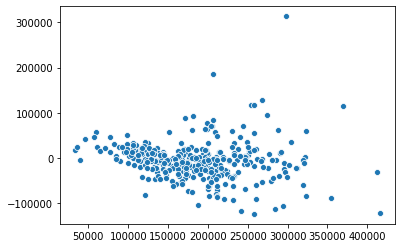

In [451]:
#Look at homoscedasicity
predictions = results.predict(X2_test)

residuals = y2_test-predictions

import seaborn as sns
sns.scatterplot(predictions,residuals)
residuals.sum()
residuals.mean()

In [454]:
# Retest the best performing linear model with the new 15 yr mortgage rates
lrm2 = LinearRegression()
lrm2.fit(X2_train, y2_train)
y2_lrmpredict = lrm2.predict(X2_test)


print("R-squared of the model on the training set is: {}".format(lrm2.score(X2_train, y2_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lrm2.score(X2_test, y2_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y2_test, y2_lrmpredict)))
print("Mean squared error of the prediction is: {}".format(mse(y2_test, y2_lrmpredict)))
print("Root mean squared error of the prediction is: {}".format(rmse(y2_test, y2_lrmpredict)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y2_test - y2_lrmpredict) / y2_test)) * 100))


R-squared of the model on the training set is: 0.6282197624998613
-----Test set statistics-----
R-squared of the model on the test set is: 0.6333142357506412
Mean absolute error of the prediction is: 29158.33669410256
Mean squared error of the prediction is: 1822300486.8325021
Root mean squared error of the prediction is: 42688.411622271706
Mean absolute percentage error of the prediction is: 18.038427410255746


Here, I added the 15 yr mortgage rate that was available for buyers at the time the homes were sold. My idea was that better interest rates would create more demand for homes purchase and raise the price of homes. Although the linear regression with the 15yr rates feature mildly reduced percent error (18 vs 18.19), the r-squared value was decreased from 0.64 to 0.633. This is not surprising since the high p-value for mortgage rates suggests this feature is not playing a role in the predicting price with the other features in place. Mortgage rates might not provide solid predictive power as the rates were in flux and the economy was still recovering from the housing crisis between the years 2008-2011. Overall, the mortgage rate did not provide additional predictive power, at least with the feature combinations I was using. 